In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Reading IPL 2022 Batters data from csv file into df2

In [12]:
df2 = pd.read_csv("IPL 2022 Batters.csv")
df2

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s
0,Jos Buttler,17,17,2,863,116,57.53,579,149.05,4,4,83
1,K L Rahul,15,15,3,616,103*,51.33,455,135.38,2,4,45
2,Quinton De Kock,15,15,1,508,140*,36.29,341,148.97,1,3,47
3,Hardik Pandya,15,15,4,487,87*,44.27,371,131.26,0,4,49
4,Shubman Gill,16,16,2,483,96,34.50,365,132.32,0,4,51
...,...,...,...,...,...,...,...,...,...,...,...,...
157,Fazalhaq Farooqi,3,1,1,2,2*,NaN,8,25.00,0,0,0
158,Jagadeesha Suchith,5,2,0,2,2,1.00,8,25.00,0,0,0
159,Tim Southee,9,5,1,2,1*,0.50,12,16.66,0,0,0
160,Nathan Coulter-Nile,1,1,1,1,1*,NaN,2,50.00,0,0,0


## Dealing with Null values.

#### isnull() function is used to search for null elements and isnull().sum() is used to get the total number of null elements. 

In [13]:
df2.isnull().sum().sum()

8

#### We will use forward fill, ffill() along rows(axis=0) of Dataframe df2 and save it in another Dataframe df.

In [14]:
df = df2.ffill(axis = 0)
df

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s
0,Jos Buttler,17,17,2,863,116,57.53,579,149.05,4,4,83
1,K L Rahul,15,15,3,616,103*,51.33,455,135.38,2,4,45
2,Quinton De Kock,15,15,1,508,140*,36.29,341,148.97,1,3,47
3,Hardik Pandya,15,15,4,487,87*,44.27,371,131.26,0,4,49
4,Shubman Gill,16,16,2,483,96,34.50,365,132.32,0,4,51
...,...,...,...,...,...,...,...,...,...,...,...,...
157,Fazalhaq Farooqi,3,1,1,2,2*,2.00,8,25.00,0,0,0
158,Jagadeesha Suchith,5,2,0,2,2,1.00,8,25.00,0,0,0
159,Tim Southee,9,5,1,2,1*,0.50,12,16.66,0,0,0
160,Nathan Coulter-Nile,1,1,1,1,1*,0.50,2,50.00,0,0,0


## Let's generate visualizations to investigate different connections within the dataset

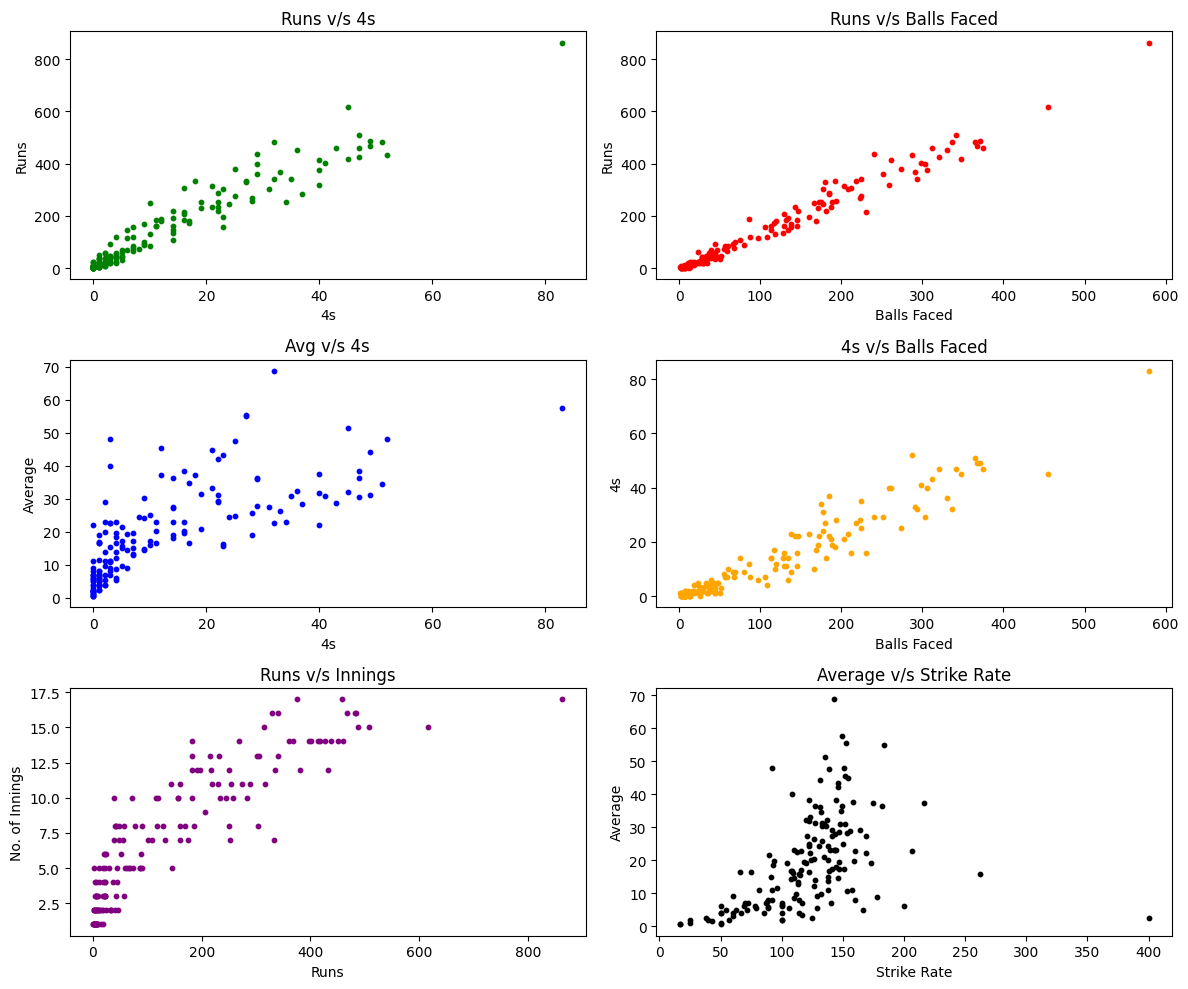

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10)) 

# Plot 1: Runs v/s 4s
plt.subplot(3, 2, 1)
plt.title("Runs v/s 4s")
plt.ylabel('Runs')
plt.xlabel('4s')
plt.scatter(df['4s'], df.Runs, color="green", s=10)

# Plot 2: Runs v/s Balls Faced
plt.subplot(3, 2, 2)
plt.title("Runs v/s Balls Faced")
plt.ylabel('Runs')
plt.xlabel('Balls Faced')
plt.scatter(df['BF'], df.Runs, color="red", s=10)

# Plot 3: Avg v/s 4s
plt.subplot(3, 2, 3)
plt.title("Avg v/s 4s")
plt.ylabel('Average')
plt.xlabel('4s')
plt.scatter(df['4s'], df.Avg, color="blue", s=10)

# Plot 4: 4s v/s Balls Faced
plt.subplot(3, 2, 4)
plt.title("4s v/s Balls Faced")
plt.ylabel('4s')
plt.xlabel('Balls Faced')
plt.scatter(df['BF'], df['4s'], color="orange", s=10)

# Plot 5: Runs v/s Innings
plt.subplot(3, 2, 5)
plt.title("Runs v/s Innings")
plt.ylabel('No. of Innings')
plt.xlabel('Runs')
plt.scatter(df['Runs'], df.Inns, color="purple", s=10)

# Plot 6: Average v/s Strike Rate
plt.subplot(3, 2, 6)
plt.title("Average v/s Strike Rate")
plt.ylabel('Average')
plt.xlabel('Strike Rate')
plt.scatter(df['SR'], df.Avg, color="black", s=10)

plt.tight_layout() 
plt.show()


# Let's see the trends in first two graphs using Linear regression.

In [21]:
reg1 = LinearRegression()
reg1.fit(df[['4s']], df.Runs)

LinearRegression()

In [43]:
reg2 = LinearRegression()
reg2.fit(df[['BF']], df['Runs'])

LinearRegression()

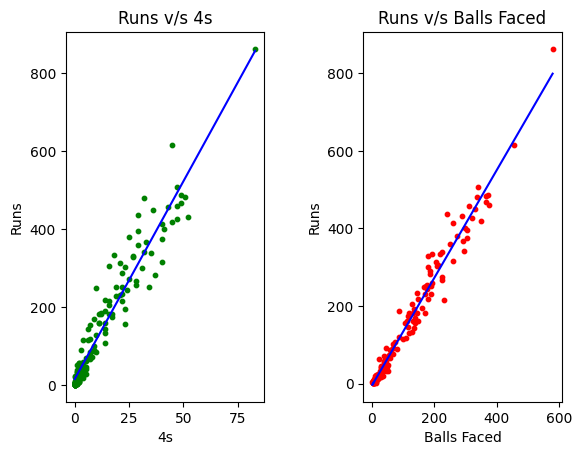

In [44]:
plt.subplot(1,2,1)
plt.title("Runs v/s 4s")
plt.ylabel('Runs')
plt.xlabel('4s')
plt.scatter(df['4s'], df.Runs, color="green", s=10)
plt.plot(df['4s'], reg1.predict(df[['4s']]), color="blue")

plt.subplot(1,2,2)
plt.title("Runs v/s Balls Faced")
plt.ylabel('Runs')
plt.xlabel('Balls Faced')
plt.scatter(df['BF'], df['Runs'], color="red", s=10)
plt.plot(df['BF'], reg2.predict(df[['BF']]), color="blue")

plt.subplots_adjust(wspace=0.5)
plt.show()

# Linear regression on the number of 4s

#### 1. For this we will need two Dataframes namely, 'features' which contain data from [Runs, BF, Avg] and 'target' which contain data of [4s] 

In [34]:
features = df[['Runs','BF','Avg']]
target = df['4s']

#### 2. The train_test_split() function from the sklearn.model_selection module is used to split the dataset into training and testing sets.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=104,test_size=0.25, shuffle=True)

#### 3. We create a Linear Regression 'model' and fit it with the training and targeting data for subsequent predictions or analysis.

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### 4. We utilize the trained Linear Regression model (model) to predict target values for both the training (X_train) and testing (X_test) datasets, to assess the model's performance on unseen data.

In [37]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

#### 5. The mean_squared_error() function from sklearn.metrics is utilized to compute the mean squared error between the actual target values (y_train and y_test) and the predicted values (train_predictions and test_predictions).

In [38]:
train_error = mean_squared_error(y_train, train_predictions)
test_error = mean_squared_error(y_test, test_predictions)

In [39]:
train_error

14.96165735922281

In [40]:
test_error

16.897655918968272